# 🤖 Singularity

In robotics, a **singularity** is a configuration of a manipulator where the robot loses some of its degrees of freedom in the end-effector.  
That means the Jacobian matrix (which maps joint velocities to end-effector velocities) becomes singular — its determinant goes to zero, or one or more singular values collapse.  

At a singularity:
- Small joint motions may cause *no* movement at the end-effector (loss of mobility).
- Or the opposite: tiny joint motions may cause *very large* end-effector velocities (loss of stability and control).
- Path planning and control become tricky, since the inverse kinematics problem can blow up near these points.

Robots usually avoid singularities (or damp their effects) to maintain smooth, predictable motion.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_two_link_arm(theta1, theta2, l1=1.0, l2=1.0):
    """
    Draw a simple 2-link planar arm.
    
    Parameters
    ----------
    theta1 : float
        Angle of the first joint (radians).
    theta2 : float
        Angle of the second joint (radians).
    l1 : float
        Length of the first link.
    l2 : float
        Length of the second link.
    """
    # Base at origin
    x0, y0 = 0, 0
    
    # First joint position
    x1 = x0 + l1 * np.cos(theta1)
    y1 = y0 + l1 * np.sin(theta1)
    
    # End effector position
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)
    
    # Plot
    plt.figure(figsize=(5,5))
    plt.plot([x0, x1, x2], [y0, y1, y2], '-o', linewidth=4, markersize=10)
    plt.scatter([x0, x1, x2], [y0, y1, y2], color="red", zorder=5)
    plt.axis("equal")
    plt.grid(True)
    plt.xlim(- (l1+l2+0.5), (l1+l2+0.5))
    plt.ylim(- (l1+l2+0.5), (l1+l2+0.5))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"2-Link Planar Arm\nθ1={np.degrees(theta1):.1f}°, θ2={np.degrees(theta2):.1f}°")
    plt.show()
    
    return (x2, y2)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


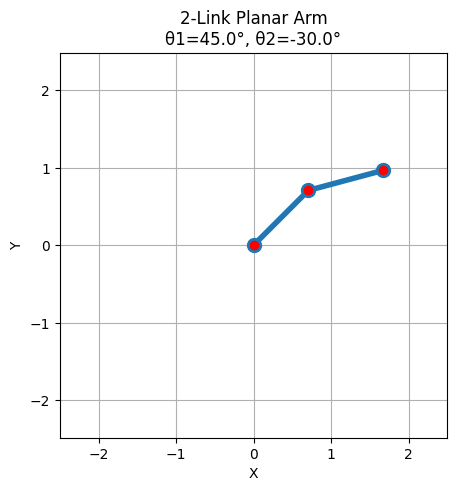

End effector position: (np.float64(1.6730326074756159), np.float64(0.9659258262890682))


In [6]:
# Example usage:
end_eff = plot_two_link_arm(theta1=np.deg2rad(45), theta2=np.deg2rad(-30))
print("End effector position:", end_eff)


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


θ1=0.00, θ2=0.00, det(J)=0.0000


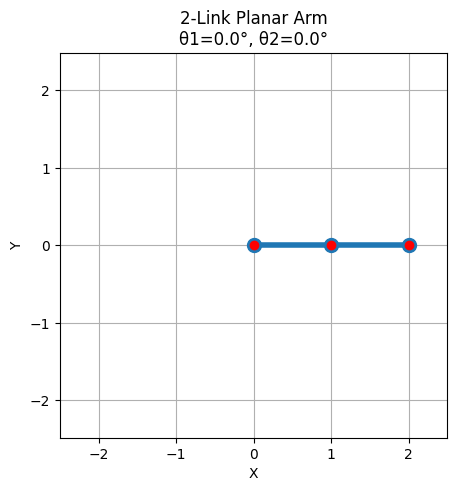

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


End effector position: (np.float64(2.0), np.float64(0.0))
θ1=1.57, θ2=0.00, det(J)=0.0000


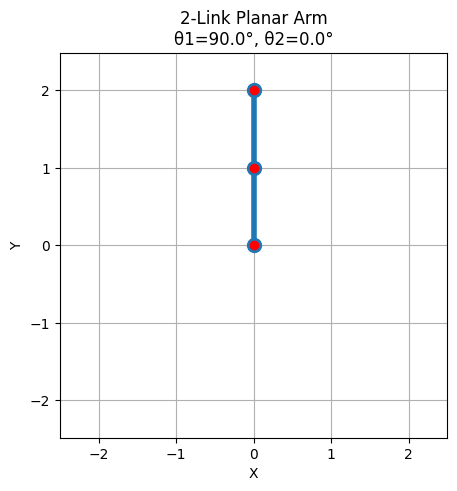

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


End effector position: (np.float64(1.2246467991473532e-16), np.float64(2.0))
θ1=3.14, θ2=0.00, det(J)=0.0000


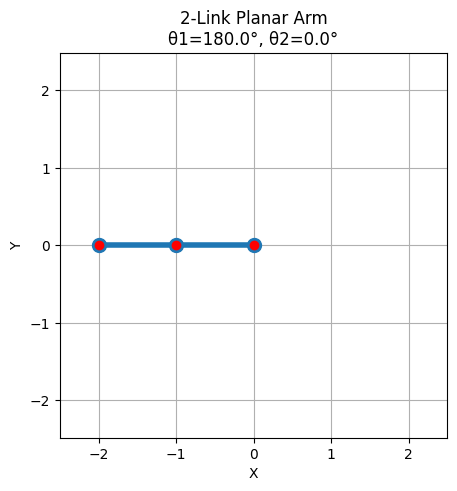

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


End effector position: (np.float64(-2.0), np.float64(2.4492935982947064e-16))
θ1=1.57, θ2=1.57, det(J)=1.0000


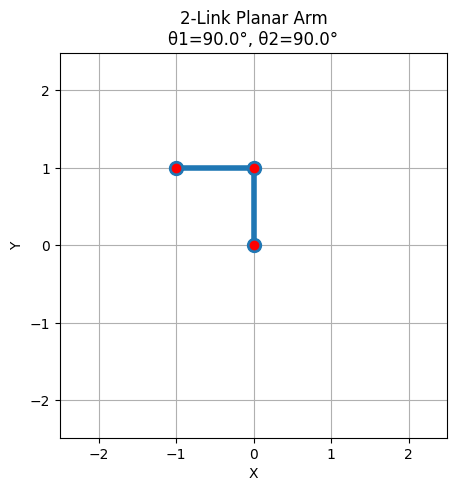

End effector position: (np.float64(-0.9999999999999999), np.float64(1.0000000000000002))


In [8]:
# Example: simple 2-link planar arm
def jacobian(theta1, theta2, l1=1.0, l2=1.0):
    J = np.array([
        [-l1*np.sin(theta1) - l2*np.sin(theta1+theta2), -l2*np.sin(theta1+theta2)],
        [ l1*np.cos(theta1) + l2*np.cos(theta1+theta2),  l2*np.cos(theta1+theta2)]
    ])
    return J

# Sample a few joint angles and compute det(J)
angles = [(0, 0), (np.pi/2, 0), (np.pi, 0), (np.pi/2, np.pi/2)]
for th1, th2 in angles:
    J = jacobian(th1, th2)
    print(f"θ1={th1:.2f}, θ2={th2:.2f}, det(J)={np.linalg.det(J):.4f}")
    end_eff = plot_two_link_arm(theta1=th1, theta2=th2)
    print("End effector position:", end_eff)
